In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('kc_house_data.csv', sep=';', parse_dates=["date"], date_format='%d.%m.%Y %H:%M')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df_copy = df.copy()

In [8]:
print(f"DF перед очисткой выбросов: {df_copy.shape}")

DF перед очисткой выбросов: (21613, 21)


### 1. Предобработка данных

#### а) Анализ и удаление выбросов

In [9]:
df_copy.isna().sum() # Проверка на пропуски

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
duplicates = df_copy[df_copy.duplicated()] # Поиск дубликатов
len(duplicates)

0

In [11]:
# Преобразуем столбец 'date' к типу datetime
df_copy['date'] = pd.to_datetime(df_copy['date'])

# Проверим минимальную и максимальную дату
df_copy['date'].min(), df_copy['date'].max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

In [12]:
df_copy.drop(['id', 'date'], axis=1, inplace=True) # Удаляем столбцы 'id' и 'date' из-за их низкой информативности

In [13]:
df_copy.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
print(f"dataframe перед очисткой выбросов: {df_copy.shape}")

# Удаляем строки с аномальными значениями в столбце 'bedrooms'
df_copy = df_copy[df_copy['bedrooms'] <= 10]

print(f"dataframe после очистки выбросов: {df_copy.shape}")

dataframe перед очисткой выбросов: (21613, 19)
dataframe после очистки выбросов: (21611, 19)


In [15]:
def remove_outliers(df): # Функция для удаления выбросов на основе критерия трех сигм
    variables = ['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']

    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]

    return df

print(f"dataframe перед очисткой выбросов: {df_copy.shape}")
df_copy = remove_outliers(df_copy)
print(f"dataframe после очистки выбросов: {df_copy.shape}")

dataframe перед очисткой выбросов: (21611, 19)
dataframe после очистки выбросов: (20050, 19)


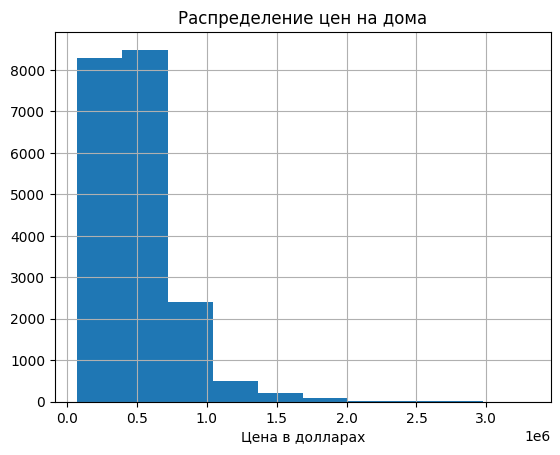

In [16]:
df_copy['price'].hist()
plt.xlabel('Цена в долларах')
plt.title('Распределение цен на дома')
plt.show()

In [17]:
for i in range (90,100): # Понять распределение цен на дома в зависимости от перцентилей
    q = i/100
    quantile = df['price'].quantile(q = q)
    print(f'{q} percentile: {round(quantile,3)}')

0.9 percentile: 887000.0
0.91 percentile: 919999.2
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1063560.0
0.95 percentile: 1156480.0
0.96 percentile: 1259040.0
0.97 percentile: 1388000.0
0.98 percentile: 1600000.0
0.99 percentile: 1964400.0


In [18]:
df_copy = df_copy[df_copy['price'] < 1965000]

In [19]:
print(f"dataframe после очистки выбросов: {df_copy.shape}")

dataframe после очистки выбросов: (19992, 19)


#### в) Стандартизация данных

In [20]:
num_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                'floors', 'sqft_above', 'sqft_basement']

df_scaled = df_copy.copy()

scaler = StandardScaler()

df_scaled[num_features] = scaler.fit_transform(df_scaled[num_features])

df_scaled[num_features].describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
count,19992.00,19992.00,19992.00,19992.00,19992.00,19992.00,19992.00,19992.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.63,-3.77,-2.94,-2.24,-0.89,-0.88,-2.04,-0.67
25%,-0.71,-0.38,-0.79,-0.76,-0.45,-0.88,-0.76,-0.67
50%,-0.23,-0.38,0.29,-0.15,-0.21,-0.88,-0.25,-0.67
75%,0.44,0.75,0.65,0.63,0.04,0.97,0.58,0.65
max,5.58,7.54,3.16,3.57,11.98,3.74,3.29,4.86


#### г) Выделение характерных признаков

цена за квадратный фут 

In [21]:
df_copy['price_per_sqft'] = df_copy['price'] / df_copy['sqft_living']

плотность застройки (отношение жилой площади к площади участка)

In [22]:
df_copy['sqft_ratio'] = df_copy['sqft_living'] / df_copy['sqft_lot']

In [23]:
df_copy[['price', 'price_per_sqft','sqft_ratio']].corr().round(2) # Корреляционная матрица для новых признаков (сравнение с ценой)

,price,price_per_sqft,sqft_ratio
price,1.00,0.56,0.18
price_per_sqft,0.56,1.00,0.12
sqft_ratio,0.18,0.12,1.00


In [24]:
drop_cols = ['zipcode'] #не нужен столбец этот
df_copy.drop(columns=drop_cols, axis=1, inplace=True)
     
df_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price_per_sqft,sqft_ratio
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,188.050847,0.208850
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,209.338521,0.354874
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,233.766234,0.077000
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,308.163265,0.392000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,303.571429,0.207921


### 2. Построение модели

In [25]:
from sklearn.model_selection import train_test_split

y = df_copy['price'] #разделяем на признаки и целевую переменную

X = df_copy.drop(['price'], axis=1)

# Делим на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### a) и б) к/ф детерминации и ошибка RMSE для линейной регрессии, гребневой и лассо

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

models = {
    'Линейная регрессия': LinearRegression(),
    'Гребневая регрессия (α=3)': Ridge(alpha=3),
    'Лассо (α=120)': Lasso(alpha=120)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append([name, round(rmse, 2), round(r2, 10)])

import pandas as pd
df_results = pd.DataFrame(results, columns=['Модель', 'RMSE', 'R²'])
print(df_results)


                      Модель      RMSE        R²
0         Линейная регрессия  78033.19  0.909174
1  Гребневая регрессия (α=3)  78027.26  0.909188
2              Лассо (α=120)  78042.05  0.909153


c:\Users\sasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.045e+13, tolerance: 1.090e+11
  model = cd_fast.enet_coordinate_descent(


In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from prettytable import PrettyTable

# создаём и обучаем три модели
lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=3).fit(X_train, y_train)
lasso = Lasso(alpha=120).fit(X_train, y_train)

# получаем коэффициенты
coefficients = pd.DataFrame({
    'Признак': X.columns,
    'Линейная регрессия': lr.coef_,
    'Гребневая (α=3)': ridge.coef_,
    'Лассо (α=120)': lasso.coef_
}).round(4)

# создаем таблицу PrettyTable
table = PrettyTable()
table.field_names = ["Признак", "Линейная регрессия", "Гребневая (α=3)", "Лассо (α=120)"]

for i, row in coefficients.iterrows():
    table.add_row(row.tolist())

print(table)


+----------------+--------------------+-----------------+---------------+
|    Признак     | Линейная регрессия | Гребневая (α=3) | Лассо (α=120) |
+----------------+--------------------+-----------------+---------------+
|    bedrooms    |     4803.0643      |    4800.3644    |   4621.5225   |
|   bathrooms    |     13002.0995     |    12988.8384   |   12199.0873  |
|  sqft_living   |      154.6636      |     154.7128    |    257.9618   |
|    sqft_lot    |      -0.1721       |      -0.173     |    -0.1789    |
|     floors     |     -1679.1275     |    -1657.033    |    -643.088   |
|   waterfront   |     87389.993      |    83248.9133   |   55264.5518  |
|      view      |     14212.0103     |    14315.7952   |   14424.3909  |
|   condition    |     11907.7974     |    11890.3139   |   11580.6101  |
|     grade      |     27295.2361     |    27248.2599   |   26456.495   |
|   sqft_above   |      75.5484       |     75.5782     |    -26.3731   |
| sqft_basement  |      79.1152       

c:\Users\sasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.045e+13, tolerance: 1.090e+11
  model = cd_fast.enet_coordinate_descent(
